In [283]:
#Pymaceuticals Inc.
#Analysis
'''
The study conducted has a nearly even distribution of sex between male and female mice, preventing any possible bias.
Propriva wasn't tested nearly as much as any of the other drug regimen but this issue wasn't 
discovered until after the duplicate mice test results were removed from the dataset. 
Some mice didn't make it to 45 days. For more accurate results in the future, either the final time point could 
be locked in at the average of all end timepoints or the mice that didn't make it as far could be removed from
the dataset all together.
There is a near direct correlation between tumor volume and the weight of the mice. 
With that being said, it doesn't appear that any other factors during the test could have caused any change in weight.
As displayed in the following series of dataframes and graphs, Capomulin has proven to be the most effective
treatment for tumors in the mice being studied, with Ramicane being a close contender.
'''

'\nAs displayed in the following series of dataframes and graphs, Capomulin has proven to be the most effective\ntreatment for tumors in the mice being studied, with Ramicane being a close contender.\n'

In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mdc = mouse_data_complete
mdc.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [285]:
# Checking the number of mice.
number_of_mice = len(pd.unique(mdc['Mouse ID']))
number_of_mice

249

In [286]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mdc[mdc.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [287]:
# ID for duplicate mice
dup_mice_id = mdc['Mouse ID'].value_counts().idxmax()
print(f"ID for duplicate mice: {dup_mice_id}")

ID for duplicate mice: g989


In [288]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_data = mdc[mdc['Mouse ID'] == dup_mice_id]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [289]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mdc_clean = mdc.drop(mdc[mdc['Mouse ID'] == dup_mice_id].index)
mdc_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [290]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = len(pd.unique(mdc_clean['Mouse ID']))
new_number_of_mice

248

In [291]:
#Summary Statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#drug_regimen = mdc_clean['Drug Regimen']

mean_tumor_volume = mdc_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

median_tumor_volume = mdc_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

var_tumor_volume = mdc_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

std_tumor_volume = mdc_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

sem_tumor_volume = mdc_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_dict = {'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume,
                 'Tumor Volume Variance': var_tumor_volume, 'Tumor Volume Std. Dev.': std_tumor_volume,
                 'Tumor Volume Std. Err.': sem_tumor_volume}
tumor_volume_df = pd.DataFrame(tumor_volume_dict)
tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [292]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#COME BACK TO THIS IF I HAVE TIME

In [293]:
#Bar and Pie Charts

#Prep for charts showing drug regimen info
%matplotlib inline
import numpy as np
drug_count = mdc_clean.groupby(['Drug Regimen'],as_index=False)['Drug Regimen'].size()

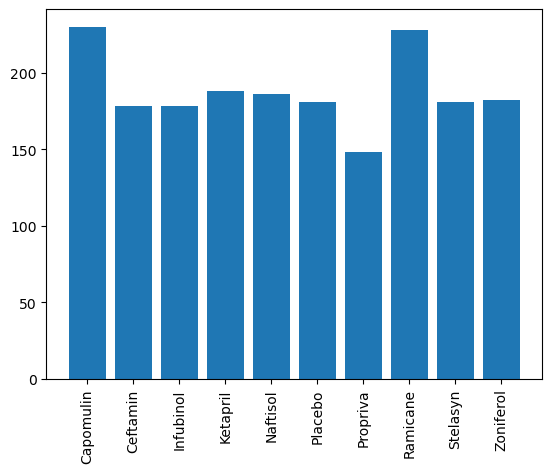

In [294]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count['Drug Regimen']
y_axis = drug_count['size']
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis, rotation='vertical')
plt.show()

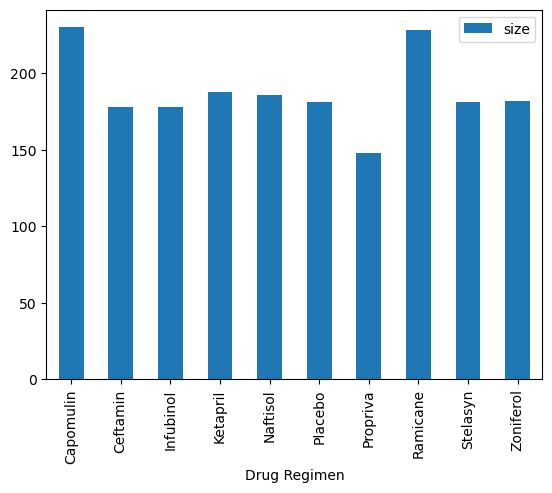

In [295]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = drug_count.set_index('Drug Regimen')
drug_count.plot(kind='bar')
plt.show()

In [296]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Grabbing count for each sex
sex_count = mdc_clean['Sex']
Male = sex_count.value_counts()['Male']
Female = sex_count.value_counts()['Female']
print(Male)
print(Female)

958
922


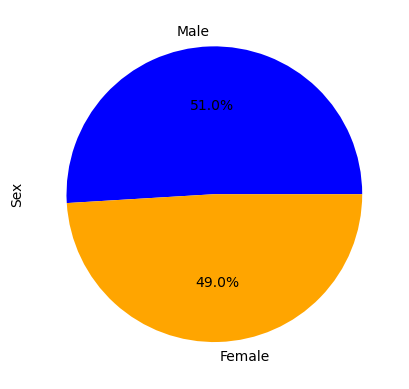

In [297]:
#Prepping for pie chart sections
sex = ['Male', 'Female']
sex_count = [958, 922]
colors = ['blue', 'orange']
plt.ylabel("Sex")
#Creating pie chart
plt.pie(sex_count, labels = sex, colors = colors, 
       autopct = '%1.1f%%')
plt.show()

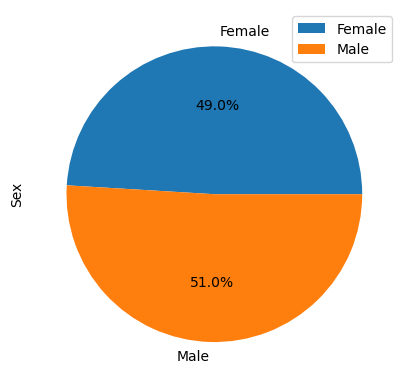

In [298]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count1 = mdc_clean.groupby(['Sex'],as_index=False)['Sex'].size()
sex_count1
sex_count1 = sex_count1.set_index('Sex')
sex_count1.plot(kind='pie', y='size',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

In [299]:
#Quartiles, Outliers, and Boxplots

#Creating a dataframe that  shows the greatest time point for each mouse
max_timepoint = mdc_clean.groupby('Mouse ID')['Timepoint'].max()
print(max_timepoint)
#combine the max_timepoints dataframe with original dataframe
add_max_df = pd.merge(mdc_clean, max_timepoint, how='right', on=['Mouse ID', 'Mouse ID'])
add_max_df.rename(columns = {'Timepoint_x':'Timepoint', 'Timepoint_y':'Final_Timepoint'}, inplace = True)
mdc_df = add_max_df
mdc_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final_Timepoint
0,a203,0,45.000000,0,Infubinol,Female,20,23,45
1,a203,5,48.508468,0,Infubinol,Female,20,23,45
2,a203,10,51.852437,1,Infubinol,Female,20,23,45
3,a203,15,52.777870,1,Infubinol,Female,20,23,45
4,a203,20,55.173336,1,Infubinol,Female,20,23,45
...,...,...,...,...,...,...,...,...,...
1875,z969,25,63.145652,2,Naftisol,Male,9,30,45
1876,z969,30,65.841013,3,Naftisol,Male,9,30,45
1877,z969,35,69.176246,4,Naftisol,Male,9,30,45
1878,z969,40,70.314904,4,Naftisol,Male,9,30,45


In [300]:
max_tumor_volume = mdc_df.groupby(['Mouse ID', 'Final_Timepoint'])[['Tumor Volume (mm3)']].max()
max_tumor_volume

,,Tumor Volume (mm3)
Mouse ID,Final_Timepoint,
a203,45,67.973419
a251,45,65.525743
a262,45,70.717621
a275,45,62.999356
a366,30,63.440686
...,...,...
z435,10,48.710661
z578,45,45.000000
z581,45,62.754451


The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
------------------------------------------------
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
------------------------------------------------
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
------------------------------------------------
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.593010457500007
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.
---------------------------------------

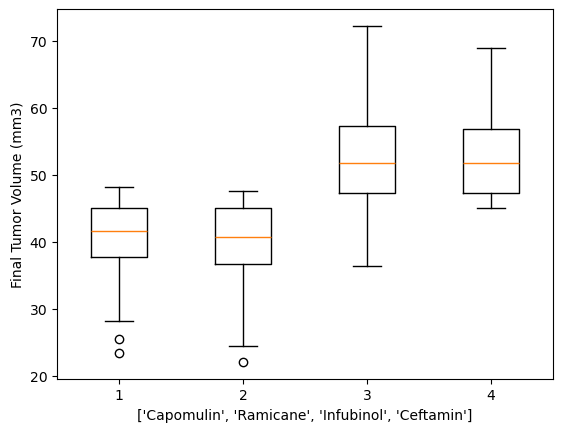

In [301]:
#Creating a list that holds the four most promising treatment regimens
top_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#Creating an empty list to hold tumor volume data
tumor_volume_data = []

for drug in top_treatments:
    filtered_mdc_df = mdc_df.loc[mdc_df['Drug Regimen'] == drug]
    final_tumor_volume = filtered_mdc_df['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print('------------------------------------------------')
    
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group
    #filtered_mdc_df.boxplot("Tumor Volume (mm3)", by="Drug Regimen")
fig1, ax1 = plt.subplots()
#ax1.set_title('Top 4 Treatments')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel(top_treatments)
ax1.boxplot(tumor_volume_data)
plt.show()

In [302]:
# Setting up for line plot for mouse l509

mdc_df_capomulin = mdc_df[mdc_df['Drug Regimen'] == 'Capomulin']
mdc_df_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final_Timepoint
174,b128,0,45.000000,0,Capomulin,Female,9,22,45
175,b128,5,45.651331,0,Capomulin,Female,9,22,45
176,b128,10,43.270852,0,Capomulin,Female,9,22,45
177,b128,15,43.784893,0,Capomulin,Female,9,22,45
178,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1818,y793,25,38.992734,2,Capomulin,Male,17,17,45
1819,y793,30,35.726023,2,Capomulin,Male,17,17,45
1820,y793,35,36.327870,2,Capomulin,Male,17,17,45
1821,y793,40,31.475411,2,Capomulin,Male,17,17,45


In [303]:
mdc_df_capomulin_l509 = mdc_df_capomulin[mdc_df_capomulin['Mouse ID'] == 'l509']
mdc_df_capomulin_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final_Timepoint
873,l509,0,45.000000,0,Capomulin,Male,17,21,45
874,l509,5,45.851193,0,Capomulin,Male,17,21,45
875,l509,10,46.759074,0,Capomulin,Male,17,21,45
876,l509,15,47.488599,1,Capomulin,Male,17,21,45
877,l509,20,48.070452,2,Capomulin,Male,17,21,45
878,l509,25,44.006257,2,Capomulin,Male,17,21,45
879,l509,30,44.708055,2,Capomulin,Male,17,21,45
880,l509,35,40.207288,2,Capomulin,Male,17,21,45
881,l509,40,40.770813,2,Capomulin,Male,17,21,45
882,l509,45,41.483008,3,Capomulin,Male,17,21,45


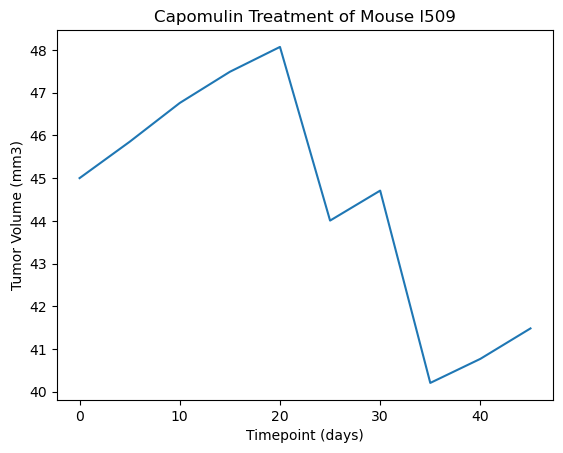

In [304]:
#Mouse l509 line plot
plt.plot(mdc_df_capomulin_l509['Timepoint'], mdc_df_capomulin_l509['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [305]:
mdc_df_capomulin_avg_tumor_volume = mdc_df_capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
print(mdc_df_capomulin_avg_tumor_volume)
mdc_df_capomulin_avg_weight = mdc_df_capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()
print(mdc_df_capomulin_avg_weight)

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64
Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64


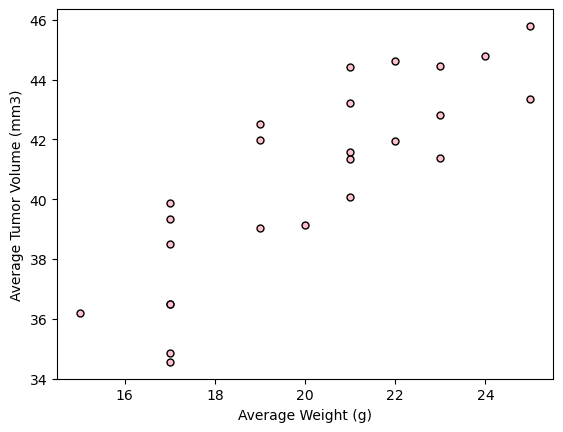

In [306]:
plt.scatter(mdc_df_capomulin_avg_weight, mdc_df_capomulin_avg_tumor_volume, marker = 'o',
            facecolors = 'pink', edgecolors = 'black', s = 25)
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between both factors is 0.84


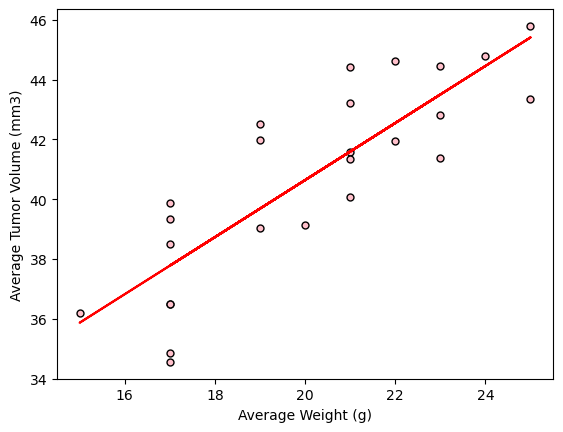

In [280]:
#Creating regression plot

slope, intercept, r_value, p_value, std_err = st.linregress(mdc_df_capomulin_avg_weight, 
                                                            mdc_df_capomulin_avg_tumor_volume)
prediction = slope * mdc_df_capomulin_avg_weight + intercept

correlation = st.pearsonr(mdc_df_capomulin_avg_weight, mdc_df_capomulin_avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.scatter(mdc_df_capomulin_avg_weight, mdc_df_capomulin_avg_tumor_volume, marker = 'o',
            facecolors = 'pink', edgecolors = 'black', s = 25)
plt.plot(mdc_df_capomulin_avg_weight, prediction, color = 'red')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()